# Задание

**Цель:** закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

**Описание задания:**
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

### Этапы работы:

1. Преобразуйте данные:**  
    a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;  
    b. закодируйте категориальные переменные числовыми значениями по необходимости.  
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
9. Сформулируйте выводы по проделанной работе:
    a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
    b. *может ли ROC-кривая проходить ниже диагонали?

### Результат:
- проведена оценка качества модели классификации;
- реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

### Форма выполнения:
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

### Инструменты:
- Jupyter Notebook/Google Colab
- GitHub
- файл athletes.csv


### Рекомендации к выполнению:
- Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [1]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


**Удаление строк с пропусками**

In [23]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


**Преобразование категориальных признаков**

In [24]:
len(data['nationality'].unique())

200

In [25]:
len(data['sport'].unique())

27

In [26]:
# В данных 200 значений с национальностями спортсменов и 27 видов спорта.
# Используем get_dummies и попробуем обучить на этом модель хоть это и будет очень большая размерность 

data = pd.get_dummies(data, columns=['sport', 'nationality'], drop_first=True)

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data.head()

,id,name,sex,dob,height,weight,gold,silver,bronze,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,nationality_ASA,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BAH,nationality_BAN,nationality_BAR,nationality_BDI,nationality_BEL,nationality_BEN,nationality_BER,nationality_BHU,nationality_BIH,nationality_BIZ,nationality_BLR,nationality_BOL,nationality_BOT,nationality_BRA,nationality_BRN,nationality_BRU,nationality_BUL,nationality_BUR,nationality_CAF,nationality_CAM,nationality_CAN,nationality_CAY,nationality_CGO,nationality_CHA,nationality_CHI,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COK,nationality_COL,nationality_COM,nationality_CPV,nationality_CRC,nationality_CRO,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DEN,nationality_DJI,nationality_DMA,nationality_DOM,nationality_ECU,nationality_EGY,nationality_ERI,nationality_ESA,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIJ,nationality_FIN,nationality_FRA,nationality_FSM,nationality_GAB,nationality_GBR,nationality_GBS,nationality_GEO,nationality_GEQ,nationality_GER,nationality_GHA,nationality_GRE,nationality_GRN,nationality_GUA,nationality_GUI,nationality_GUM,nationality_GUY,nationality_HAI,nationality_HKG,nationality_HON,nationality_HUN,nationality_INA,nationality_IND,nationality_IOA,nationality_IRI,nationality_IRL,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_ISV,nationality_ITA,nationality_IVB,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KIR,nationality_KOR,nationality_KOS,nationality_KSA,nationality_LAO,nationality_LAT,nationality_LBA,nationality_LCA,nationality_LES,nationality_LIB,nationality_LIE,nationality_LTU,nationality_LUX,nationality_MAD,nationality_MAR,nationality_MAS,nationality_MAW,nationality_MDA,nationality_MEX,nationality_MGL,nationality_MHL,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MNE,nationality_MON,nationality_MOZ,nationality_MRI,nationality_MTN,nationality_MYA,nationality_NAM,nationality_NCA,nationality_NED,nationality_NEP,nationality_NGR,nationality_NIG,nationality_NOR,nationality_NRU,nationality_NZL,nationality_OMA,nationality_PAK,nationality_PAN,nationality_PAR,nationality_PER,nationality_PHI,nationality_PLE,nationality_PLW,nationality_PNG,nationality_POL,nationality_POR,nationality_PRK,nationality_PUR,nationality_QAT,nationality_ROT,nationality_ROU,nationality_RSA,nationality_RUS,nationality_RWA,nationality_SAM,nationality_SEN,nationality_SEY,nationality_SIN,nationality_SKN,nationality_SLO,nationality_SMR,nationality_SOL,nationality_SRB,nationality_SRI,nationality_SSD,nationality_STP,nationality_SUD,nationality_SUI,nationality_SUR,nationality_SVK,nationality_SWE,nationality_SWZ,nationality_SYR,nationality_TAN,nationality_TGA,nationality_THA,nationality_TJK,nationality_TKM,nationality_TOG,nationality_TPE,nationality_TTO,nationality_TUN,nationality_TUR,nationality_TUV,nationality_UAE,nationality_UKR,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,736041664,A Jesus Garcia,male,10/17/69,1.72,64.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
# Целевой столбец "sex" переведем в бинарный вид

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['sex'] = encoder.fit_transform(data['sex'])

In [32]:
data.head()

,id,name,sex,dob,height,weight,gold,silver,bronze,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,nationality_ASA,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BAH,nationality_BAN,nationality_BAR,nationality_BDI,nationality_BEL,nationality_BEN,nationality_BER,nationality_BHU,nationality_BIH,nationality_BIZ,nationality_BLR,nationality_BOL,nationality_BOT,nationality_BRA,nationality_BRN,nationality_BRU,nationality_BUL,nationality_BUR,nationality_CAF,nationality_CAM,nationality_CAN,nationality_CAY,nationality_CGO,nationality_CHA,nationality_CHI,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COK,nationality_COL,nationality_COM,nationality_CPV,nationality_CRC,nationality_CRO,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DEN,nationality_DJI,nationality_DMA,nationality_DOM,nationality_ECU,nationality_EGY,nationality_ERI,nationality_ESA,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIJ,nationality_FIN,nationality_FRA,nationality_FSM,nationality_GAB,nationality_GBR,nationality_GBS,nationality_GEO,nationality_GEQ,nationality_GER,nationality_GHA,nationality_GRE,nationality_GRN,nationality_GUA,nationality_GUI,nationality_GUM,nationality_GUY,nationality_HAI,nationality_HKG,nationality_HON,nationality_HUN,nationality_INA,nationality_IND,nationality_IOA,nationality_IRI,nationality_IRL,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_ISV,nationality_ITA,nationality_IVB,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KIR,nationality_KOR,nationality_KOS,nationality_KSA,nationality_LAO,nationality_LAT,nationality_LBA,nationality_LCA,nationality_LES,nationality_LIB,nationality_LIE,nationality_LTU,nationality_LUX,nationality_MAD,nationality_MAR,nationality_MAS,nationality_MAW,nationality_MDA,nationality_MEX,nationality_MGL,nationality_MHL,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MNE,nationality_MON,nationality_MOZ,nationality_MRI,nationality_MTN,nationality_MYA,nationality_NAM,nationality_NCA,nationality_NED,nationality_NEP,nationality_NGR,nationality_NIG,nationality_NOR,nationality_NRU,nationality_NZL,nationality_OMA,nationality_PAK,nationality_PAN,nationality_PAR,nationality_PER,nationality_PHI,nationality_PLE,nationality_PLW,nationality_PNG,nationality_POL,nationality_POR,nationality_PRK,nationality_PUR,nationality_QAT,nationality_ROT,nationality_ROU,nationality_RSA,nationality_RUS,nationality_RWA,nationality_SAM,nationality_SEN,nationality_SEY,nationality_SIN,nationality_SKN,nationality_SLO,nationality_SMR,nationality_SOL,nationality_SRB,nationality_SRI,nationality_SSD,nationality_STP,nationality_SUD,nationality_SUI,nationality_SUR,nationality_SVK,nationality_SWE,nationality_SWZ,nationality_SYR,nationality_TAN,nationality_TGA,nationality_THA,nationality_TJK,nationality_TKM,nationality_TOG,nationality_TPE,nationality_TTO,nationality_TUN,nationality_TUR,nationality_TUV,nationality_UAE,nationality_UKR,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,736041664,A Jesus Garcia,1,10/17/69,1.72,64.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**Разделение выборки на обучающее и тестовое данные**

In [33]:
# Подготовм y

y = data['sex']

y.head()

0    1
1    0
2    1
3    1
4    1
Name: sex, dtype: int64

In [59]:
# Подготовим x

# Вот эти столбы не нужны в нашем Х подмножестве
columns = ['id', 'name', 'sex', 'dob']

X = data.drop(columns=columns)

In [37]:
X.head()

,height,weight,gold,silver,bronze,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,nationality_ASA,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BAH,nationality_BAN,nationality_BAR,nationality_BDI,nationality_BEL,nationality_BEN,nationality_BER,nationality_BHU,nationality_BIH,nationality_BIZ,nationality_BLR,nationality_BOL,nationality_BOT,nationality_BRA,nationality_BRN,nationality_BRU,nationality_BUL,nationality_BUR,nationality_CAF,nationality_CAM,nationality_CAN,nationality_CAY,nationality_CGO,nationality_CHA,nationality_CHI,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COK,nationality_COL,nationality_COM,nationality_CPV,nationality_CRC,nationality_CRO,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DEN,nationality_DJI,nationality_DMA,nationality_DOM,nationality_ECU,nationality_EGY,nationality_ERI,nationality_ESA,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIJ,nationality_FIN,nationality_FRA,nationality_FSM,nationality_GAB,nationality_GBR,nationality_GBS,nationality_GEO,nationality_GEQ,nationality_GER,nationality_GHA,nationality_GRE,nationality_GRN,nationality_GUA,nationality_GUI,nationality_GUM,nationality_GUY,nationality_HAI,nationality_HKG,nationality_HON,nationality_HUN,nationality_INA,nationality_IND,nationality_IOA,nationality_IRI,nationality_IRL,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_ISV,nationality_ITA,nationality_IVB,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KIR,nationality_KOR,nationality_KOS,nationality_KSA,nationality_LAO,nationality_LAT,nationality_LBA,nationality_LCA,nationality_LES,nationality_LIB,nationality_LIE,nationality_LTU,nationality_LUX,nationality_MAD,nationality_MAR,nationality_MAS,nationality_MAW,nationality_MDA,nationality_MEX,nationality_MGL,nationality_MHL,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MNE,nationality_MON,nationality_MOZ,nationality_MRI,nationality_MTN,nationality_MYA,nationality_NAM,nationality_NCA,nationality_NED,nationality_NEP,nationality_NGR,nationality_NIG,nationality_NOR,nationality_NRU,nationality_NZL,nationality_OMA,nationality_PAK,nationality_PAN,nationality_PAR,nationality_PER,nationality_PHI,nationality_PLE,nationality_PLW,nationality_PNG,nationality_POL,nationality_POR,nationality_PRK,nationality_PUR,nationality_QAT,nationality_ROT,nationality_ROU,nationality_RSA,nationality_RUS,nationality_RWA,nationality_SAM,nationality_SEN,nationality_SEY,nationality_SIN,nationality_SKN,nationality_SLO,nationality_SMR,nationality_SOL,nationality_SRB,nationality_SRI,nationality_SSD,nationality_STP,nationality_SUD,nationality_SUI,nationality_SUR,nationality_SVK,nationality_SWE,nationality_SWZ,nationality_SYR,nationality_TAN,nationality_TGA,nationality_THA,nationality_TJK,nationality_TKM,nationality_TOG,nationality_TPE,nationality_TTO,nationality_TUN,nationality_TUR,nationality_TUV,nationality_UAE,nationality_UKR,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,1.72,64.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [60]:
# Нормализация Х

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[['height', 'weight']] = scaler.fit_transform(X[['height', 'weight']])

In [61]:
X.head()

,height,weight,gold,silver,bronze,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,nationality_ASA,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BAH,nationality_BAN,nationality_BAR,nationality_BDI,nationality_BEL,nationality_BEN,nationality_BER,nationality_BHU,nationality_BIH,nationality_BIZ,nationality_BLR,nationality_BOL,nationality_BOT,nationality_BRA,nationality_BRN,nationality_BRU,nationality_BUL,nationality_BUR,nationality_CAF,nationality_CAM,nationality_CAN,nationality_CAY,nationality_CGO,nationality_CHA,nationality_CHI,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COK,nationality_COL,nationality_COM,nationality_CPV,nationality_CRC,nationality_CRO,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DEN,nationality_DJI,nationality_DMA,nationality_DOM,nationality_ECU,nationality_EGY,nationality_ERI,nationality_ESA,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIJ,nationality_FIN,nationality_FRA,nationality_FSM,nationality_GAB,nationality_GBR,nationality_GBS,nationality_GEO,nationality_GEQ,nationality_GER,nationality_GHA,nationality_GRE,nationality_GRN,nationality_GUA,nationality_GUI,nationality_GUM,nationality_GUY,nationality_HAI,nationality_HKG,nationality_HON,nationality_HUN,nationality_INA,nationality_IND,nationality_IOA,nationality_IRI,nationality_IRL,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_ISV,nationality_ITA,nationality_IVB,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KIR,nationality_KOR,nationality_KOS,nationality_KSA,nationality_LAO,nationality_LAT,nationality_LBA,nationality_LCA,nationality_LES,nationality_LIB,nationality_LIE,nationality_LTU,nationality_LUX,nationality_MAD,nationality_MAR,nationality_MAS,nationality_MAW,nationality_MDA,nationality_MEX,nationality_MGL,nationality_MHL,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MNE,nationality_MON,nationality_MOZ,nationality_MRI,nationality_MTN,nationality_MYA,nationality_NAM,nationality_NCA,nationality_NED,nationality_NEP,nationality_NGR,nationality_NIG,nationality_NOR,nationality_NRU,nationality_NZL,nationality_OMA,nationality_PAK,nationality_PAN,nationality_PAR,nationality_PER,nationality_PHI,nationality_PLE,nationality_PLW,nationality_PNG,nationality_POL,nationality_POR,nationality_PRK,nationality_PUR,nationality_QAT,nationality_ROT,nationality_ROU,nationality_RSA,nationality_RUS,nationality_RWA,nationality_SAM,nationality_SEN,nationality_SEY,nationality_SIN,nationality_SKN,nationality_SLO,nationality_SMR,nationality_SOL,nationality_SRB,nationality_SRI,nationality_SSD,nationality_STP,nationality_SUD,nationality_SUI,nationality_SUR,nationality_SVK,nationality_SWE,nationality_SWZ,nationality_SYR,nationality_TAN,nationality_TGA,nationality_THA,nationality_TJK,nationality_TKM,nationality_TOG,nationality_TPE,nationality_TTO,nationality_TUN,nationality_TUR,nationality_TUV,nationality_UAE,nationality_UKR,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,0.51,0.237410,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [63]:
X_train.head()

,height,weight,gold,silver,bronze,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,nationality_ASA,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BAH,nationality_BAN,nationality_BAR,nationality_BDI,nationality_BEL,nationality_BEN,nationality_BER,nationality_BHU,nationality_BIH,nationality_BIZ,nationality_BLR,nationality_BOL,nationality_BOT,nationality_BRA,nationality_BRN,nationality_BRU,nationality_BUL,nationality_BUR,nationality_CAF,nationality_CAM,nationality_CAN,nationality_CAY,nationality_CGO,nationality_CHA,nationality_CHI,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COK,nationality_COL,nationality_COM,nationality_CPV,nationality_CRC,nationality_CRO,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DEN,nationality_DJI,nationality_DMA,nationality_DOM,nationality_ECU,nationality_EGY,nationality_ERI,nationality_ESA,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIJ,nationality_FIN,nationality_FRA,nationality_FSM,nationality_GAB,nationality_GBR,nationality_GBS,nationality_GEO,nationality_GEQ,nationality_GER,nationality_GHA,nationality_GRE,nationality_GRN,nationality_GUA,nationality_GUI,nationality_GUM,nationality_GUY,nationality_HAI,nationality_HKG,nationality_HON,nationality_HUN,nationality_INA,nationality_IND,nationality_IOA,nationality_IRI,nationality_IRL,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_ISV,nationality_ITA,nationality_IVB,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KIR,nationality_KOR,nationality_KOS,nationality_KSA,nationality_LAO,nationality_LAT,nationality_LBA,nationality_LCA,nationality_LES,nationality_LIB,nationality_LIE,nationality_LTU,nationality_LUX,nationality_MAD,nationality_MAR,nationality_MAS,nationality_MAW,nationality_MDA,nationality_MEX,nationality_MGL,nationality_MHL,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MNE,nationality_MON,nationality_MOZ,nationality_MRI,nationality_MTN,nationality_MYA,nationality_NAM,nationality_NCA,nationality_NED,nationality_NEP,nationality_NGR,nationality_NIG,nationality_NOR,nationality_NRU,nationality_NZL,nationality_OMA,nationality_PAK,nationality_PAN,nationality_PAR,nationality_PER,nationality_PHI,nationality_PLE,nationality_PLW,nationality_PNG,nationality_POL,nationality_POR,nationality_PRK,nationality_PUR,nationality_QAT,nationality_ROT,nationality_ROU,nationality_RSA,nationality_RUS,nationality_RWA,nationality_SAM,nationality_SEN,nationality_SEY,nationality_SIN,nationality_SKN,nationality_SLO,nationality_SMR,nationality_SOL,nationality_SRB,nationality_SRI,nationality_SSD,nationality_STP,nationality_SUD,nationality_SUI,nationality_SUR,nationality_SVK,nationality_SWE,nationality_SWZ,nationality_SYR,nationality_TAN,nationality_TGA,nationality_THA,nationality_TJK,nationality_TKM,nationality_TOG,nationality_TPE,nationality_TTO,nationality_TUN,nationality_TUR,nationality_TUV,nationality_UAE,nationality_UKR,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
2759,0.49,0.273381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Обучение модели

In [121]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [122]:
model.fit(X_train, y_train)

LogisticRegression()

In [123]:
predictions = model.predict_proba(X_test)

In [124]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, ..., 0, 0, 1])

In [125]:
model.score(X_test, y_test)

0.8425414364640884

### ROC

In [126]:
from sklearn.metrics import roc_curve

In [127]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [128]:
import  matplotlib.pyplot as plt



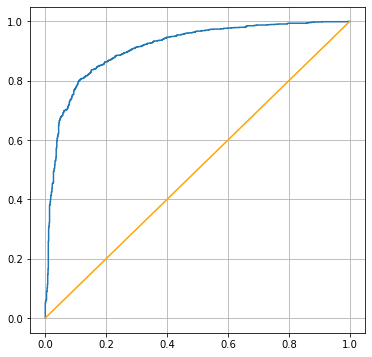

In [129]:
plt.figure(figsize=(6, 6))

plt.plot( fpr, tpr )
plt.plot([0, 1], [0, 1], color="orange")
plt.grid()

### ROC-AUC

In [130]:
from sklearn.metrics import roc_auc_score

In [131]:
# Полученное значение можно трактовать как хороший резлуьтат работы модели

roc_auc_score( y_test, predictions[:, 1] )

0.91128209763685

### TPR, FPR 

In [132]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [133]:
tp, fp, fn, tn

(978, 152, 190, 852)

In [202]:
# Функция для подсчета TPR и FPR

def roc_curve(y_true, y_prob, thresholds):

    fpr = []
    tpr = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return fpr, tpr

In [203]:
fpr_manual, tpr_manual  = roc_curve(y_test, predictions[:, 0], predictions[:, 1])

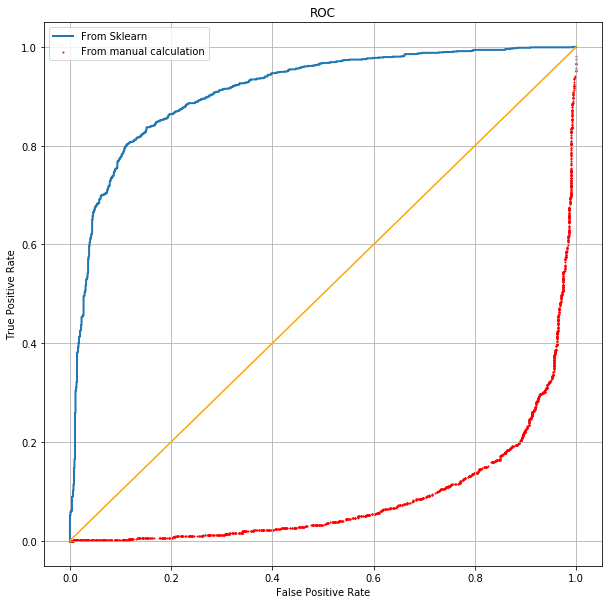

In [204]:
# Получается одинаковая кривая, но кривая из значений подсчитанных вручную почему-то получилась отраженной по диагонали... 

plt.figure(figsize=(10, 10))

plt.plot( fpr, tpr, linewidth=2, label='From Sklearn')
plt.scatter( fpr_manual, tpr_manual, color='red', s=1 , label='From manual calculation')
#plt.plot( np.array(results[1]), np.array(results[0]), color='red' , label='From manual calculation')
plt.plot([0, 1], [0, 1], color="orange")

plt.title("ROC")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.legend()


plt.grid()

In [218]:
# В ручную посчитать Precision-Recall Curve не получилось, но вот какая она получаетсчя через sklearn

from sklearn. metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])


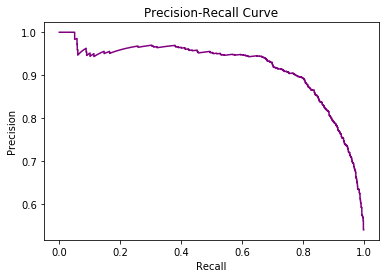

In [224]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show() 